In [4]:
using Plots
using Flux
using StaticArrays

In [11]:
n = 100
dx = rand(n)
dy = sin.(4*pi*dx) + 0.00*randn(n);

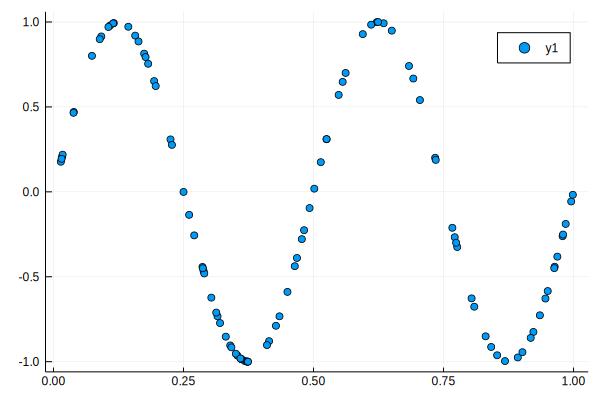

In [12]:
scatter(dx, dy)

In [37]:
m = Chain(Dense(1,50,σ), Dense(50,50,σ), Dense(50,1))

Chain(Dense(1, 50, σ), Dense(50, 50, σ), Dense(50, 1))

In [38]:
loss(x, y) = Flux.mse(m(x), y)

loss (generic function with 1 method)

In [39]:
ps = Flux.params(m)

Params([Float32[0.1260752; 0.32078886; … ; -0.095857814; -0.14022097], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[-0.07690846 -0.0840986 … 0.1423559 -0.05998736; 0.06210805 -0.21686539 … -0.041445002 0.045141395; … ; -0.072861135 0.0008159702 … -0.10100633 0.2029195; 0.21837534 0.08127856 … -0.15515213 -0.18357424], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[-0.2415898 0.33394095 … -0.16933608 -0.036889557], Float32[0.0]])

In [40]:
data = [(SVector(dx[i]), SVector(dy[i])) for i in 1:length(dx)]

100-element Array{Tuple{SArray{Tuple{1},Float64,1,1},SArray{Tuple{1},Float64,1,1}},1}:
 ([0.4818638416249892], [-0.22593786350987222]) 
 ([0.5947241526134281], [0.9284948352528887])   
 ([0.2706247338348302], [-0.25628614011504125]) 
 ([0.8530771720995729], [-0.9622919206434586])  
 ([0.9848763362583415], [-0.1889075664338009])  
 ([0.33125964551158527], [-0.8527034896574498]) 
 ([0.9954737518591696], [-0.056847848028252525])
 ([0.016592898345915374], [0.20700485873257796])
 ([0.683602991049229], [0.7408731346021008])    
 ([0.2864445442486039], [-0.44213327459301044]) 
 ([0.968848198147414], [-0.3815430792004196])   
 ([0.4639513594091089], [-0.43766543355286047]) 
 ([0.4923864830358322], [-0.09552838248870894]) 
 ⋮                                              
 ([0.09193246898135854], [0.9148989287217543])  
 ([0.1770681798571756], [0.7934692488130773])   
 ([0.6241296881593357], [0.9999401953176655])   
 ([0.5014890113729562], [0.01871037690702501])  
 ([0.3035115403016255], [-0.622

1000

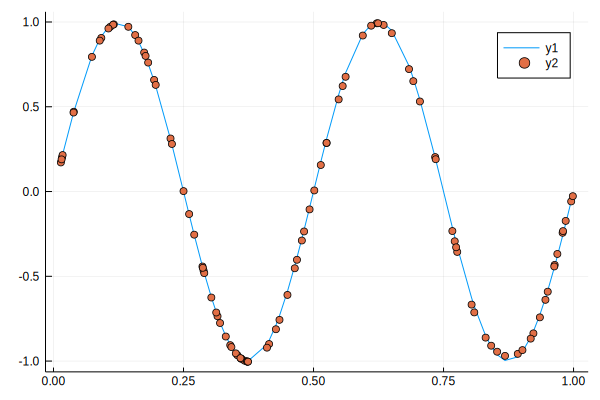

In [42]:
for i in 1:1000
    Flux.train!(loss, ps, data, ADAM())
    if i%10 == 0
        p = plot(sort(dx), x->(sin(4*pi*x)))
        scatter!(p, dx, [first(y) for y in m.(d[1] for d in data)])
        IJulia.clear_output(true)
        display(i)
        display(p)
    end
end